In [45]:
# dataset: https://archive.ics.uci.edu/ml/datasets/Mushroom. 
#1) study dataset and description of it
#2) pandas dataframe with columns edible/poisonous, odor, and [one of your choosing]
#3) name each column
#4) Replace the codes used in the data with numeric values [scikit-learn]
#5) show the distribution of data for each of the columns you selected
#6) show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
#7) text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting 
#if a specific mushroom is edible or poisonous.

In [46]:
#import the usual pandas and numpy
import pandas as pd
import numpy as np
#import beautifulsoup and requests to get the information from the website
from bs4 import BeautifulSoup
import requests

#website url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
#requesting the text from the url
results = (requests.get(url)).text

#comes out in html, i want the plain text, needs an html parser
soup = BeautifulSoup(results, "html.parser")
print soup

p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m
e,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g
e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m
e,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g
p,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u
e,x,f,n,f,n,f,w,b,n,t,e,s,f,w,w,p,w,o,e,k,a,g
e,s,f,g,f,n,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,y,u
e,f,f,w,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
p,x,s,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,g
p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,s,u
p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,s,u
e,b,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,s,m
p,x,y,n,t,p,f,c,n,n,e,e,s,s,w,w,p,

In [47]:
#blank list
rows = list()

#iterate over to get the text so i can work with it
for line in soup:
    #append jut the text to the blank list
    rows.append(soup.get_text(strip=True))
    #separate into separate rows by backslash and new line
    df = line.split("\\")
    df = line.split("\n")
    print df

[u'p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u', u'e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g', u'e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m', u'p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u', u'e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g', u'e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g', u'e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m', u'e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m', u'p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g', u'e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m', u'e,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g', u'e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m', u'e,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g', u'p,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u', u'e,x,f,n,f,n,f,w,b,n,t,e,s,f,w,w,p,w,o,e,k,a,g', u'e,s,f,g,f,n,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,y,u', u'e,f,f,w,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g', u'p,x,s,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,g', u'p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,n,s,u', u'p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,s,u',

In [48]:
#put into a dataframe
df = pd.DataFrame(df)
print df

                                                  0
0     p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1     e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2     e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3     p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4     e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5     e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6     e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7     e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8     p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9     e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m
10    e,x,y,y,t,l,f,c,b,g,e,c,s,s,w,w,p,w,o,p,n,n,g
11    e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,s,m
12    e,b,s,y,t,a,f,c,b,w,e,c,s,s,w,w,p,w,o,p,n,s,g
13    p,x,y,w,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,v,u
14    e,x,f,n,f,n,f,w,b,n,t,e,s,f,w,w,p,w,o,e,k,a,g
15    e,s,f,g,f,n,f,c,n,k,e,e,s,s,w,w,p,w,o,p,n,y,u
16    e,f,f,w,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
17    p,x,s,n,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,g
18    p,x,y,

In [49]:
#have to separate into different columns
#using comma as a deliminator?

df = df[0].apply(lambda x: pd.Series(x.split(',')))
print df

     0    1    2    3    4    5    6    7    8    9  ...    13   14   15   16  \
0     p    x    s    n    t    p    f    c    n    k ...     s    w    w    p   
1     e    x    s    y    t    a    f    c    b    k ...     s    w    w    p   
2     e    b    s    w    t    l    f    c    b    n ...     s    w    w    p   
3     p    x    y    w    t    p    f    c    n    n ...     s    w    w    p   
4     e    x    s    g    f    n    f    w    b    k ...     s    w    w    p   
5     e    x    y    y    t    a    f    c    b    n ...     s    w    w    p   
6     e    b    s    w    t    a    f    c    b    g ...     s    w    w    p   
7     e    b    y    w    t    l    f    c    b    n ...     s    w    w    p   
8     p    x    y    w    t    p    f    c    n    p ...     s    w    w    p   
9     e    b    s    y    t    a    f    c    b    g ...     s    w    w    p   
10    e    x    y    y    t    l    f    c    b    g ...     s    w    w    p   
11    e    x    y    y    t 

In [50]:
#drop the unnecessary columns
#only keep columns edible/poisonous (0), odor(5), and habitat [column of my choosing] (22)
df.drop(df.columns[[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]], axis=1, inplace=True)
print df

     0    5    22
0     p    p    u
1     e    a    g
2     e    l    m
3     p    p    u
4     e    n    g
5     e    a    g
6     e    a    m
7     e    l    m
8     p    p    g
9     e    a    m
10    e    l    g
11    e    a    m
12    e    a    g
13    p    p    u
14    e    n    g
15    e    n    u
16    e    n    g
17    p    p    g
18    p    p    u
19    p    p    u
20    e    a    m
21    p    p    g
22    e    l    m
23    e    a    m
24    e    l    m
25    p    p    g
26    e    a    m
27    e    l    m
28    e    n    u
29    e    a    d
...  ..  ...  ...
8095  p    m    d
8096  e    n    g
8097  p    s    l
8098  p    y    d
8099  e    n    g
8100  e    n    l
8101  p    s    p
8102  e    n    l
8103  e    n    l
8104  e    n    l
8105  e    n    l
8106  e    n    l
8107  e    n    l
8108  p    y    l
8109  e    n    g
8110  e    n    l
8111  e    n    g
8112  e    n    l
8113  p    y    d
8114  p    m    d
8115  e    n    l
8116  p    s    l
8117  p    y    d
8118  p   

In [51]:
#rename the columns with the appropriate titles
df = df.rename(columns={0: "Edible/Poisonous", 5: "Odor", 22: "Habitat"})
print df

     Edible/Poisonous Odor Habitat
0                   p    p       u
1                   e    a       g
2                   e    l       m
3                   p    p       u
4                   e    n       g
5                   e    a       g
6                   e    a       m
7                   e    l       m
8                   p    p       g
9                   e    a       m
10                  e    l       g
11                  e    a       m
12                  e    a       g
13                  p    p       u
14                  e    n       g
15                  e    n       u
16                  e    n       g
17                  p    p       g
18                  p    p       u
19                  p    p       u
20                  e    a       m
21                  p    p       g
22                  e    l       m
23                  e    a       m
24                  e    l       m
25                  p    p       g
26                  e    a       m
27                  

In [52]:
#4) Replace the codes used in the data with numeric values [scikit-learn]
#in the first “target” column, “e” might become 0 and “p” might become 1.
#classes: edible=e, poisonous=p
#edible: 4208 (51.8%)
#poisonous: 3916 (48.2%)
df['Edible/Poisonous'] = df['Edible/Poisonous'].replace(['e', 'p'], [0, 1])
print df

     Edible/Poisonous Odor Habitat
0                   1    p       u
1                   0    a       g
2                   0    l       m
3                   1    p       u
4                   0    n       g
5                   0    a       g
6                   0    a       m
7                   0    l       m
8                   1    p       g
9                   0    a       m
10                  0    l       g
11                  0    a       m
12                  0    a       g
13                  1    p       u
14                  0    n       g
15                  0    n       u
16                  0    n       g
17                  1    p       g
18                  1    p       u
19                  1    p       u
20                  0    a       m
21                  1    p       g
22                  0    l       m
23                  0    a       m
24                  0    l       m
25                  1    p       g
26                  0    a       m
27                  

In [53]:
#5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
df['Odor'] = df['Odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], [0, 1, 2, 3, 4, 5, 6, 7, 8])
print df

     Edible/Poisonous  Odor Habitat
0                   1   7.0       u
1                   0   0.0       g
2                   0   1.0       m
3                   1   7.0       u
4                   0   6.0       g
5                   0   0.0       g
6                   0   0.0       m
7                   0   1.0       m
8                   1   7.0       g
9                   0   0.0       m
10                  0   1.0       g
11                  0   0.0       m
12                  0   0.0       g
13                  1   7.0       u
14                  0   6.0       g
15                  0   6.0       u
16                  0   6.0       g
17                  1   7.0       g
18                  1   7.0       u
19                  1   7.0       u
20                  0   0.0       m
21                  1   7.0       g
22                  0   1.0       m
23                  0   0.0       m
24                  0   1.0       m
25                  1   7.0       g
26                  0   0.0 

In [54]:
#22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d
df['Habitat'] = df['Habitat'].replace(['g', 'l', 'm', 'n', 'p', 'u', 'w', 'd'], [0, 1, 2, 3, 4, 5, 6, 7])
print df

     Edible/Poisonous  Odor  Habitat
0                   1   7.0      5.0
1                   0   0.0      0.0
2                   0   1.0      2.0
3                   1   7.0      5.0
4                   0   6.0      0.0
5                   0   0.0      0.0
6                   0   0.0      2.0
7                   0   1.0      2.0
8                   1   7.0      0.0
9                   0   0.0      2.0
10                  0   1.0      0.0
11                  0   0.0      2.0
12                  0   0.0      0.0
13                  1   7.0      5.0
14                  0   6.0      0.0
15                  0   6.0      5.0
16                  0   6.0      0.0
17                  1   7.0      0.0
18                  1   7.0      5.0
19                  1   7.0      5.0
20                  0   0.0      2.0
21                  1   7.0      0.0
22                  0   1.0      2.0
23                  0   0.0      2.0
24                  0   1.0      2.0
25                  1   7.0      0.0
2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000156BD780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000154F9FD0>]], dtype=object)

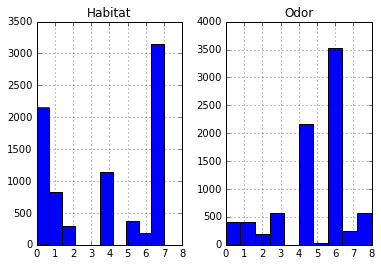

In [55]:
#5) show the distribution of data for each of the columns you selected
#6) show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.

# showing a visual distribution of data = histogram

#matplotlab
import matplotlib as mpl
#matplotlib plotting functions
import matplotlib.pyplot as plt
#we want our plots inline
%matplotlib inline

#draw the histogram
df.hist()

#classes: edible=e, poisonous=p
#edible: 4208 (51.8%)
#poisonous: 3916 (48.2%)
#5. odor: 0 almond=a, 1 anise=l, 2 creosote=c, 3 fishy=y, 4 foul=f, 5 musty=m, 6 none=n, 7 pungent=p, 8 spicy=s
#22. habitat: 0 grasses=g, 1 leaves=l, 2 meadows=m, 3 paths=p, 4 urban=u, 5 waste=w, 6 woods=d
#total: 8124 instances

#regular histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014FE70F0>]], dtype=object)

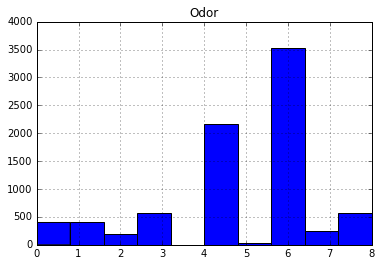

In [56]:
#histogram of odor alone
df.hist('Odor')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000151B05C0>]], dtype=object)

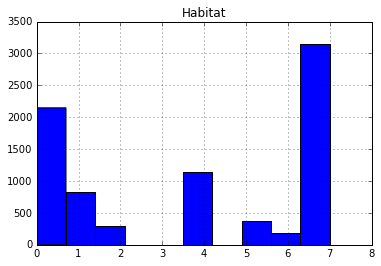

In [57]:
#histogram of Edible/Poisonous alone
#df.hist('Edible/Poisonous') #throws an error

#histogram of Habitat alone
df.hist('Habitat')

Edible/Poisonous
0    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
1    [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
     [[Axes(0.125,0.125;0.336957x0.775), Axes(0.563...
dtype: object

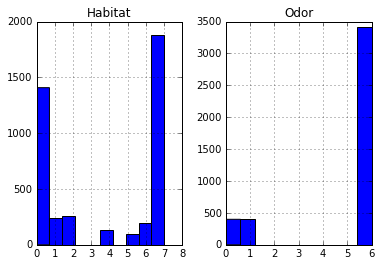

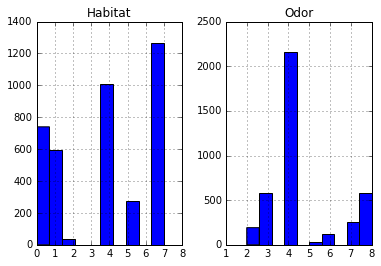

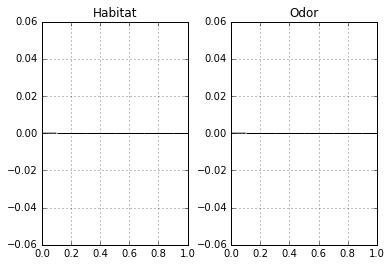

In [58]:
#habitats and odors based on edible and poisonous mushrooms
#5. odor: 0 almond=a, 1 anise=l, 2 creosote=c, 3 fishy=y, 4 foul=f, 5 musty=m, 6 none=n, 7 pungent=p, 8 spicy=s
#22. habitat: 0 grasses=g, 1 leaves=l, 2 meadows=m, 3 paths=p, 4 urban=u, 5 waste=w, 6 woods=d
df.groupby('Edible/Poisonous').hist()

Odor
0.0    [[Axes(0.125,0.125;0.775x0.775)]]
1.0    [[Axes(0.125,0.125;0.775x0.775)]]
2.0    [[Axes(0.125,0.125;0.775x0.775)]]
3.0    [[Axes(0.125,0.125;0.775x0.775)]]
4.0    [[Axes(0.125,0.125;0.775x0.775)]]
5.0    [[Axes(0.125,0.125;0.775x0.775)]]
6.0    [[Axes(0.125,0.125;0.775x0.775)]]
7.0    [[Axes(0.125,0.125;0.775x0.775)]]
8.0    [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

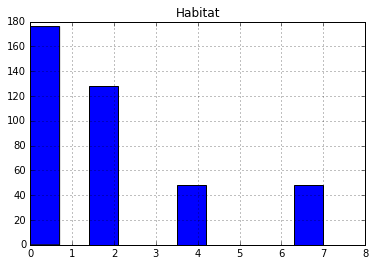

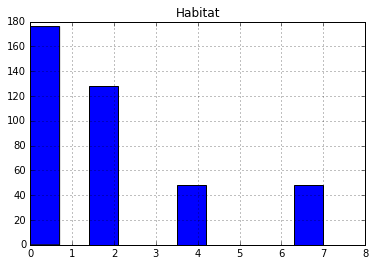

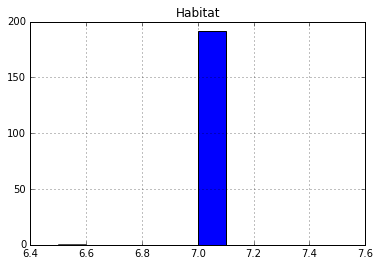

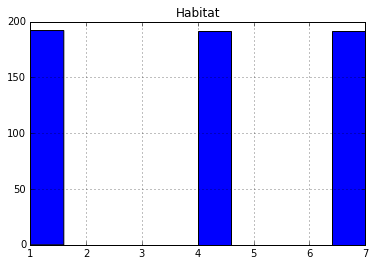

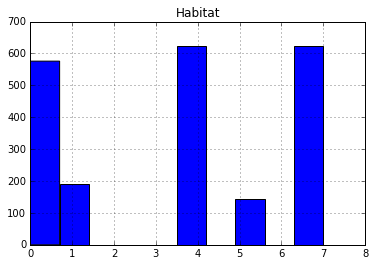

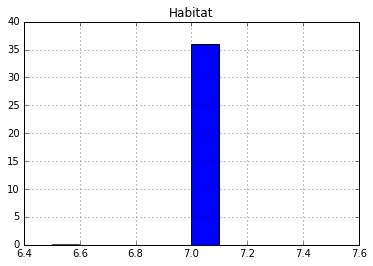

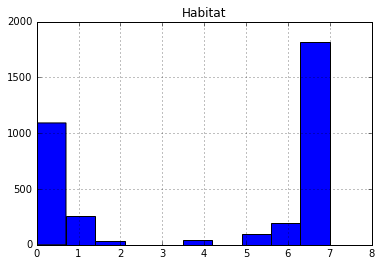

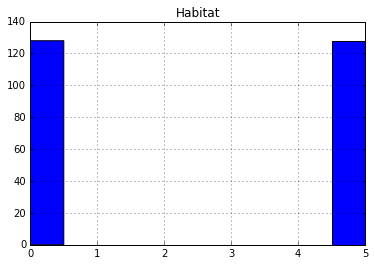

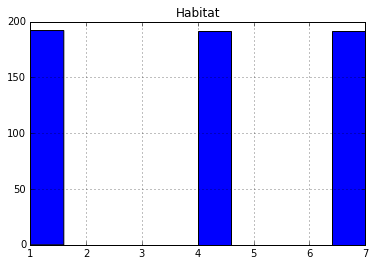

In [59]:
#habitats based on odors
#5. odor: 0 almond=a, 1 anise=l, 2 creosote=c, 3 fishy=y, 4 foul=f, 5 musty=m, 6 none=n, 7 pungent=p, 8 spicy=s
#22. habitat: 0 grasses=g, 1 leaves=l, 2 meadows=m, 3 paths=p, 4 urban=u, 5 waste=w, 6 woods=d
df.groupby('Odor').hist()

Habitat
0.0    [[Axes(0.125,0.125;0.775x0.775)]]
1.0    [[Axes(0.125,0.125;0.775x0.775)]]
2.0    [[Axes(0.125,0.125;0.775x0.775)]]
4.0    [[Axes(0.125,0.125;0.775x0.775)]]
5.0    [[Axes(0.125,0.125;0.775x0.775)]]
6.0    [[Axes(0.125,0.125;0.775x0.775)]]
7.0    [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

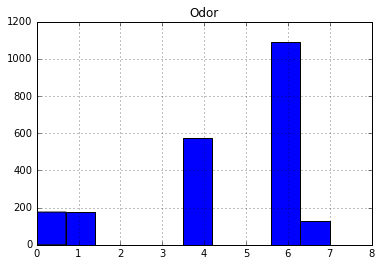

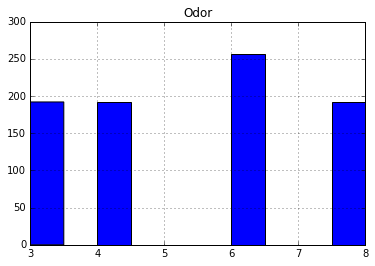

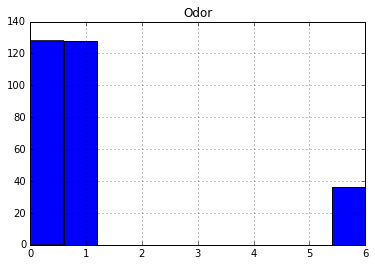

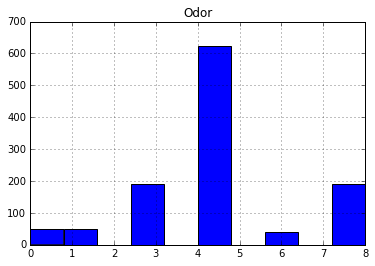

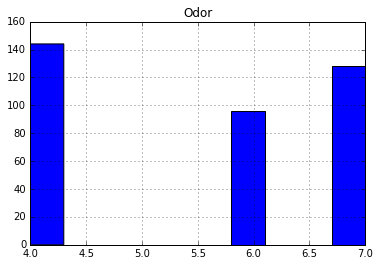

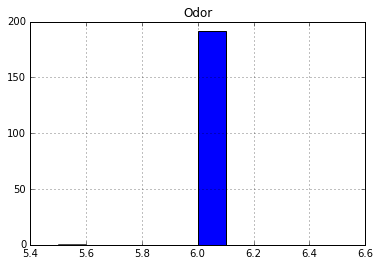

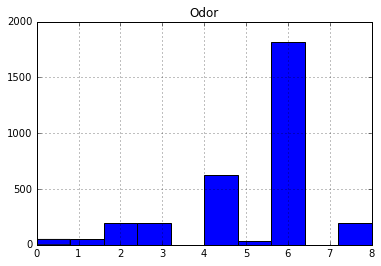

In [60]:
#odors based on habitat
#5. odor: 0 almond=a, 1 anise=l, 2 creosote=c, 3 fishy=y, 4 foul=f, 5 musty=m, 6 none=n, 7 pungent=p, 8 spicy=s
#22. habitat: 0 grasses=g, 1 leaves=l, 2 meadows=m, 3 paths=p, 4 urban=u, 5 waste=w, 6 woods=d
df.groupby('Habitat').hist()

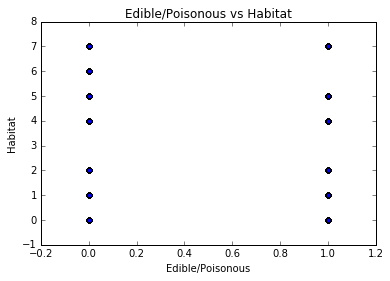

In [61]:
#scatter plot on Edible/Poisonous vs Habitat
#5. odor: 0 almond=a, 1 anise=l, 2 creosote=c, 3 fishy=y, 4 foul=f, 5 musty=m, 6 none=n, 7 pungent=p, 8 spicy=s
#22. habitat: 0 grasses=g, 1 leaves=l, 2 meadows=m, 3 paths=p, 4 urban=u, 5 waste=w, 6 woods=d
plt.scatter(df['Edible/Poisonous'], df["Habitat"])
plt.xlabel('Edible/Poisonous')
plt.ylabel('Habitat')
plt.title('Edible/Poisonous vs Habitat')

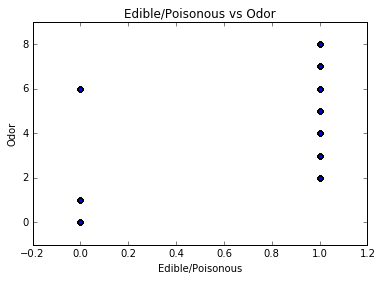

In [62]:
#scatter plot on Edible/Poisonous vs Odor
#5. odor: 0 almond=a, 1 anise=l, 2 creosote=c, 3 fishy=y, 4 foul=f, 5 musty=m, 6 none=n, 7 pungent=p, 8 spicy=s
#22. habitat: 0 grasses=g, 1 leaves=l, 2 meadows=m, 3 paths=p, 4 urban=u, 5 waste=w, 6 woods=d
plt.scatter(df['Edible/Poisonous'], df["Odor"])
plt.xlabel('Edible/Poisonous')
plt.ylabel('Odor')
plt.title('Edible/Poisonous vs Odor')

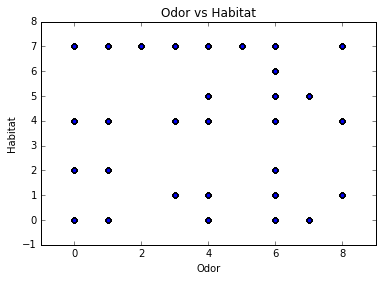

In [63]:
#scatter plot on odor vs habitat
#5. odor: 0 almond=a, 1 anise=l, 2 creosote=c, 3 fishy=y, 4 foul=f, 5 musty=m, 6 none=n, 7 pungent=p, 8 spicy=s
#22. habitat: 0 grasses=g, 1 leaves=l, 2 meadows=m, 3 paths=p, 4 urban=u, 5 waste=w, 6 woods=d
plt.scatter(df['Odor'], df["Habitat"])
plt.xlabel('Odor')
plt.ylabel('Habitat')
plt.title('Odor vs Habitat')

In [64]:
#Include some text describing your preliminary conclusions about whether either of the other columns 
#could be helpful in predicting if a specific mushroom is edible or poisonous.

#Regarding this, the histograms can help identify poisionous vs edible mushrooms by odor and by habitat
#for example, mushrooms based on the histogram of habitats and odors based on edible and poisonous mushrooms
# edible mushrooms have no odor and are mostly found in the woods habitat
#meanwhile poisonous mushrooms have a fishy odor and are also found mostly in the woods habitat
#therefore, this histogram has told you that if you are in a woods habitat and certain mushroom spell fishy, that means
#they are poisonous

#the scatter plots are more organized and therefore can help better with this
#for example, in the scatter plt, odor vs habitat, it can be seen that odor 6(no odor) is the odor found in most habitats,
#meanwhile habitat 7 is the habitat where most odors can be found. 
#This information is extremely useful in determining and identifying certain odors